In [1]:
from pymongo import MongoClient
import pandas as pd
import time

In [2]:
client = MongoClient("localhost:27017")

In [3]:
client.list_database_names()

['Ironhack', 'admin', 'config', 'local']

In [4]:
db = client["Ironhack"]

In [5]:
c = db.get_collection("companies")

In [6]:
c

Collection(Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'Ironhack'), 'companies')

In [7]:
c.find_one()

{'_id': ObjectId('52cdef7c4bab8bd675297d8a'),
 'name': 'Wetpaint',
 'permalink': 'abc2',
 'crunchbase_url': 'http://www.crunchbase.com/company/wetpaint',
 'homepage_url': 'http://wetpaint-inc.com',
 'blog_url': 'http://digitalquarters.net/',
 'blog_feed_url': 'http://digitalquarters.net/feed/',
 'twitter_username': 'BachelrWetpaint',
 'category_code': 'web',
 'number_of_employees': 47,
 'founded_year': 2005,
 'founded_month': 10,
 'founded_day': 17,
 'deadpooled_year': 1,
 'tag_list': 'wiki, seattle, elowitz, media-industry, media-platform, social-distribution-system',
 'alias_list': '',
 'email_address': 'info@wetpaint.com',
 'phone_number': '206.859.6300',
 'description': 'Technology Platform Company',
 'created_at': datetime.datetime(2007, 5, 25, 6, 51, 27),
 'updated_at': 'Sun Dec 08 07:15:44 UTC 2013',
 'overview': '<p>Wetpaint is a technology platform company that uses its proprietary state-of-the-art technology and expertise in social media to build and monetize audiences for di

In [8]:
c.distinct("offices")[0]

{'description': None,
 'address1': None,
 'address2': None,
 'zip_code': None,
 'city': None,
 'state_code': None,
 'country_code': 'CAN',
 'latitude': 56.130366,
 'longitude': -106.346771}

In [9]:
c.distinct("total_money_raised")

['$0',
 '$1.01M',
 '$1.02M',
 '$1.03M',
 '$1.04M',
 '$1.05M',
 '$1.06B',
 '$1.08M',
 '$1.09M',
 '$1.11M',
 '$1.13M',
 '$1.14M',
 '$1.15B',
 '$1.15M',
 '$1.16B',
 '$1.17M',
 '$1.19M',
 '$1.1B',
 '$1.1M',
 '$1.21M',
 '$1.23M',
 '$1.25M',
 '$1.27M',
 '$1.2B',
 '$1.2M',
 '$1.31M',
 '$1.32M',
 '$1.33M',
 '$1.35M',
 '$1.36M',
 '$1.3M',
 '$1.42M',
 '$1.44M',
 '$1.45M',
 '$1.46M',
 '$1.4M',
 '$1.51M',
 '$1.53M',
 '$1.55M',
 '$1.56M',
 '$1.57M',
 '$1.58M',
 '$1.5M',
 '$1.61M',
 '$1.62M',
 '$1.63M',
 '$1.65M',
 '$1.66M',
 '$1.67M',
 '$1.68M',
 '$1.69M',
 '$1.6M',
 '$1.71M',
 '$1.72M',
 '$1.73M',
 '$1.75M',
 '$1.77B',
 '$1.77M',
 '$1.7M',
 '$1.81M',
 '$1.82M',
 '$1.83M',
 '$1.84M',
 '$1.8M',
 '$1.92M',
 '$1.94M',
 '$1.95M',
 '$1.96M',
 '$1.97M',
 '$1.98M',
 '$1.99M',
 '$1.9M',
 '$10.1M',
 '$10.2M',
 '$10.3M',
 '$10.4M',
 '$10.5M',
 '$10.6M',
 '$10.7M',
 '$10.8M',
 '$10.9M',
 '$100M',
 '$100k',
 '$101M',
 '$101k',
 '$102M',
 '$103M',
 '$104M',
 '$105M',
 '$105k',
 '$106M',
 '$107M',
 '$108M',
 '$1

In [10]:
c.distinct("category_code")

[None,
 'advertising',
 'analytics',
 'automotive',
 'biotech',
 'cleantech',
 'consulting',
 'design',
 'ecommerce',
 'education',
 'enterprise',
 'fashion',
 'finance',
 'games_video',
 'government',
 'hardware',
 'health',
 'hospitality',
 'legal',
 'local',
 'manufacturing',
 'medical',
 'messaging',
 'mobile',
 'music',
 'nanotech',
 'network_hosting',
 'news',
 'nonprofit',
 'other',
 'photo_video',
 'public_relations',
 'real_estate',
 'search',
 'security',
 'semiconductor',
 'social',
 'software',
 'sports',
 'transportation',
 'travel',
 'web']

In [11]:
condition1= {"total_money_raised": {"$regex": "[MB]$"}}
condition2={"tag_list": {"$regex": "design"}}
condition3={"category_code": "design"}

query = {"$and": [condition1 ,{"$or": [condition2, condition3]}]}
projection={"name":1, "_id":0, "total_money_raised":1, 
            "tag_list":1, "description":1, "offices":1, "category_code":1 }

design_companies=list(c.find(query, projection).sort('offices.country_code'))

In [12]:
df=pd.DataFrame(design_companies)
df.sample()

,name,category_code,tag_list,description,total_money_raised,offices
21,Carrier IQ,mobile,"wireless, network, network-architecture, distr...",Mobile intelligence solutions,$42M,"[{'description': '', 'address1': '1200 Villa S..."


In [13]:
df.iloc[4]["offices"]

[{'description': 'Registered Office',
  'address1': '178-180 Hotwell Road',
  'address2': '',
  'zip_code': 'BS8 4RP',
  'city': 'Bristol',
  'state_code': None,
  'country_code': 'GBR',
  'latitude': None,
  'longitude': None},
 {'description': 'US Sales & Marketing',
  'address1': '2225 East Bayshore Rd',
  'address2': 'Suite 200',
  'zip_code': '94303',
  'city': 'Palo Alto',
  'state_code': 'CA',
  'country_code': 'USA',
  'latitude': None,
  'longitude': None}]

In [14]:
df['city'] = ''

for index, row in df.iterrows():
    offices = row['offices']  
    for i in range(len(offices)):  
        city = offices[i].get('city', '')  
        df.at[index, 'city'] += (city + ' ,')

In [15]:
df['state_code'] = ''

for index, row in df.iterrows():
    offices = row['offices']  
    for i in range(len(offices)):  
        x = offices[i].get('state_code', '')  
        df.at[index, 'state_code'] += (str(x) + ' ,')

In [16]:
df

,name,category_code,tag_list,description,total_money_raised,offices,city,state_code
0,Pumant,software,"software-development, programmers, designers, ...",None,$1.2M,"[{'description': 'International Office', 'addr...","Birmingham ,Buenos Aires ,","None ,None ,"
1,99designs,design,"graphic-design, crowdsourcing, online-marketpl...",Online graphic design marketplace,$35M,"[{'description': 'United States (HQ)', 'addres...","San Francisco ,Collingwood ,Berlin ,","CA ,None ,None ,"
2,Sitemasher,enterprise,"website-design-and-management-platform, saas",,C$5M,"[{'description': '', 'address1': 'Suite 200', ...","Vancouver ,Coral Gables ,","None ,FL ,"
3,Netbiscuits,mobile,"mobile-web, cloud-platform, adaptive-web-techn...",Mobile Web Development Platform,$27M,"[{'description': 'Headquarters', 'address1': '...","Kaiserslautern ,London ,New York ,San Francisco ,","None ,None ,NY ,CA ,"
4,Gnodal,network_hosting,"design, infrastructure, systems",High Performance Datacenter,$2.19M,"[{'description': 'Registered Office', 'address...","Bristol ,Palo Alto ,","None ,CA ,"
5,Moonfruit,design,,,$2.25M,"[{'description': 'UK Office', 'address1': '', ...","London ,","None ,"
6,EasyLink,network_hosting,"easylink, india, web-design, web-application-d...",None,$5.4M,"[{'description': None, 'address1': 'C-Block, 1...","Chennai ,","None ,"
7,Wix,web,"website, widget, design, flash, internet",Drag-and-Drop Web Publishing Platform,$58.5M,"[{'description': '', 'address1': '', 'address2...","Tel Aviv ,San Francisco ,","None ,CA ,"
8,DoNanza,web,"freelance, search, freelance-jobs, freelance-t...",Freelance jobs search and tools,$1M,"[{'description': 'Israel Office', 'address1': ...","Tel Aviv ,","None ,"
9,Access Point,advertising,"web-design, web-development, logo-design, bran...",,$4.5M,"[{'description': 'Iasi Office', 'address1': 'S...","Iasi ,","None ,"


In [17]:
cities_list=list(df['city'])

In [18]:
cities = [city.strip() for cities in cities_list for city in cities.split(',')]
cities = [city for city in cities if city != '']

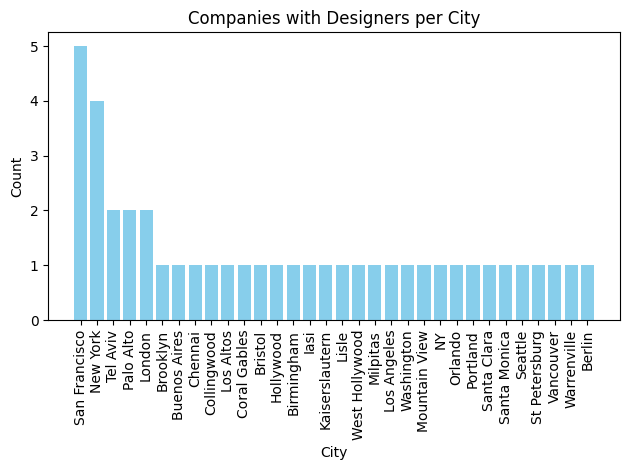

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a list called 'cities' with the city names
unique_cities, city_counts = np.unique(cities, return_counts=True)

#Sort the cities and counts in descending order
sorted_indices = np.argsort(city_counts)[::-1]
unique_cities = unique_cities[sorted_indices]
city_counts = city_counts[sorted_indices]

#Create a bar plot
plt.bar(unique_cities, city_counts, color='skyblue')

#Set the labels and title
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Companies with Designers per City')

#Rotate the x-axis labels for better visibility
plt.xticks(rotation=90)

#Adjust the layout
plt.tight_layout()

#Display the plot
plt.show()

In [20]:
df.to_csv("../dataframes/design_companies.csv", index=False)

In [21]:
ondition1={"total_money_raised":  {"$regex": "M$"}}
condition2={"description": {"$regex": "gam"}}
condition3={"category_code": "games-video"}

query = {"$and": [condition1,{"$or": [condition2, condition3]}]}
projection={"name":1, "_id":0, "total_money_raised":1, 
            "tag_list":1, "description":1, "offices":1, "category_code":1 }

gaming_money_raised=list(c.find(query, projection))

In [22]:
df2=pd.DataFrame(gaming_money_raised)
df2.sample()

,name,category_code,tag_list,description,total_money_raised,offices
30,Moondo,games_video,,Online gaming world,$6M,[]


In [23]:
len(gaming_money_raised)

51

In [24]:
df2['total_money_raised']

0       $12M
1     $44.7M
2     $10.5M
3     $16.6M
4     $3.97M
5        $3M
6     $46.3M
7       $84M
8     $37.7M
9     $14.5M
10    $23.3M
11     $860M
12     $5.8M
13     $9.5M
14       $7M
15    $17.1M
16     $1.9M
17      $21M
18    $5.92M
19    $82.8M
20    $5.23M
21    €2.75M
22    $15.5M
23    $76.6M
24    $5.55M
25       $1M
26      $15M
27       $6M
28     $4.5M
29       $8M
30       $6M
31       $2M
32    $7.26M
33     $7.5M
34     $7.5M
35    $25.5M
36       $1M
37     ¥464M
38      $59M
39    €1.75M
40      $80M
41    $7.66M
42      $19M
43     €1.5M
44    $8.25M
45     $1.5M
46    $40.8M
47       €3M
48       $7M
49    $3.86M
50     €420M
Name: total_money_raised, dtype: object

In [25]:
df2['currency'] = ''
# Iterate over the rows and update the 'currency' column based on the symbols
for index, row in df2.iterrows():
    if '€' in row['total_money_raised']:
        df2.at[index, 'currency'] = '€'
    elif '$' in row['total_money_raised']:
        df2.at[index, 'currency'] = '$'
    elif '¥' in row['total_money_raised']:
        df2.at[index, 'currency'] = '¥'

In [26]:

import re

# Remove non-numeric elements from the 'total_money_raised' column
df2['total_money_raised'] = df2['total_money_raised'].str.replace(r'\D', '', regex=True)


In [27]:
df2['total_money_raised']

0      12
1     447
2     105
3     166
4     397
5       3
6     463
7      84
8     377
9     145
10    233
11    860
12     58
13     95
14      7
15    171
16     19
17     21
18    592
19    828
20    523
21    275
22    155
23    766
24    555
25      1
26     15
27      6
28     45
29      8
30      6
31      2
32    726
33     75
34     75
35    255
36      1
37    464
38     59
39    175
40     80
41    766
42     19
43     15
44    825
45     15
46    408
47      3
48      7
49    386
50    420
Name: total_money_raised, dtype: object

In [28]:
df2['currency']

0     $
1     $
2     $
3     $
4     $
5     $
6     $
7     $
8     $
9     $
10    $
11    $
12    $
13    $
14    $
15    $
16    $
17    $
18    $
19    $
20    $
21    €
22    $
23    $
24    $
25    $
26    $
27    $
28    $
29    $
30    $
31    $
32    $
33    $
34    $
35    $
36    $
37    ¥
38    $
39    €
40    $
41    $
42    $
43    €
44    $
45    $
46    $
47    €
48    $
49    $
50    €
Name: currency, dtype: object

In [29]:
df2['total_money_raised'] = df2['total_money_raised'].astype(float)

In [30]:
for index, row in df2.iterrows():
    if row["currency"] == "€":
        df2.at[index, 'total_money_raised'] *= 1.2
    elif row["currency"] == "¥":
        df2.at[index, 'total_money_raised'] *= 0.0074

In [31]:
df2['total_money_raised'] =df2['total_money_raised'].round(1)
df2['total_money_raised'] 

0      12.0
1     447.0
2     105.0
3     166.0
4     397.0
5       3.0
6     463.0
7      84.0
8     377.0
9     145.0
10    233.0
11    860.0
12     58.0
13     95.0
14      7.0
15    171.0
16     19.0
17     21.0
18    592.0
19    828.0
20    523.0
21    330.0
22    155.0
23    766.0
24    555.0
25      1.0
26     15.0
27      6.0
28     45.0
29      8.0
30      6.0
31      2.0
32    726.0
33     75.0
34     75.0
35    255.0
36      1.0
37      3.4
38     59.0
39    210.0
40     80.0
41    766.0
42     19.0
43     18.0
44    825.0
45     15.0
46    408.0
47      3.6
48      7.0
49    386.0
50    504.0
Name: total_money_raised, dtype: float64

In [32]:
df2 = df2.sort_values('total_money_raised',ascending=False)
df2 = df2.reset_index(drop=True)
df2

,name,category_code,tag_list,description,total_money_raised,offices,currency
0,Zynga,games_video,"facebookapplications, games, socialnetworking,...",Network of gaming applications,860.0,"[{'description': 'SF HQ', 'address1': '365 Ver...",$
1,Realtime Worlds,games_video,games,"Entertainment software, Videogames",828.0,"[{'description': None, 'address1': '', 'addres...",$
2,Crispy Gamer,games_video,"videogaming, community, editorial, the-game-tr...",videogame review community,825.0,"[{'description': '', 'address1': '35 West 36th...",$
3,Aurora Feint,games_video,,games and platforms for iPhone,766.0,"[{'description': 'HQ', 'address1': '330 Primro...",$
4,Turbine,games_video,"game, online-games, social-gaming, role-playin...",creates and operates online games,766.0,"[{'description': None, 'address1': '60 Glacier...",$
5,Atari,games_video,,video game software,726.0,"[{'description': 'HQ', 'address1': '417 Fifth ...",$
6,Pikum,games_video,"gaming, social-networks, first-round-capital, ...",Online betting game,592.0,"[{'description': None, 'address1': '7 Chalcot ...",$
7,Sometrics,games_video,"analytics, social-media, social-networking, ad...",In-game Payment Solutions,555.0,"[{'description': '', 'address1': '', 'address2...",$
8,Cellufun,games_video,cellufun,Mobile social gaming community,523.0,"[{'description': 'Worldwide HQ', 'address1': '...",$
9,Bigpoint,games_video,"online-games, browser-games, browsergames, bro...",developer and provider of online games,504.0,"[{'description': 'Bigpoint Headquarters', 'add...",€


In [33]:
df2["offices"][0][0]['city']

'San Francisco'

In [34]:
df2["offices"][4]

[{'description': None,
  'address1': '60 Glacier Drive, Suite 4000',
  'address2': '',
  'zip_code': '',
  'city': 'Westwood',
  'state_code': 'MA',
  'country_code': 'USA',
  'latitude': 42.214483,
  'longitude': -71.185964},
 {'description': '',
  'address1': '',
  'address2': '',
  'zip_code': '',
  'city': 'Redwood City',
  'state_code': 'CA',
  'country_code': 'USA',
  'latitude': 37.477652,
  'longitude': -122.223384}]

In [35]:
df2['city'] = ''

for index, row in df2.iterrows():
    offices = row['offices']  
    for i in range(len(offices)):  
        city = offices[i].get('city', '')  
        df2.at[index, 'city'] += (city + ' ,')

In [36]:
df2['country_code'] = ''

for index, row in df2.iterrows():
    offices = row['offices']  
    for i in range(len(offices)):  
        code = offices[i].get('country_code', '')  
        df2.at[index, 'country_code'] += (code + ' ')

In [37]:
df2.to_csv("../dataframes/game_companies.csv", index=False)

In [38]:
df2.head(30)

,name,category_code,tag_list,description,total_money_raised,offices,currency,city,country_code
0,Zynga,games_video,"facebookapplications, games, socialnetworking,...",Network of gaming applications,860.0,"[{'description': 'SF HQ', 'address1': '365 Ver...",$,"San Francisco , ,Baltimore ,Los Angeles ,",USA IND USA USA
1,Realtime Worlds,games_video,games,"Entertainment software, Videogames",828.0,"[{'description': None, 'address1': '', 'addres...",$,"Dundee ,Boulder ,",GBR USA
2,Crispy Gamer,games_video,"videogaming, community, editorial, the-game-tr...",videogame review community,825.0,"[{'description': '', 'address1': '35 West 36th...",$,"New York ,",USA
3,Aurora Feint,games_video,,games and platforms for iPhone,766.0,"[{'description': 'HQ', 'address1': '330 Primro...",$,"Burlingame ,",USA
4,Turbine,games_video,"game, online-games, social-gaming, role-playin...",creates and operates online games,766.0,"[{'description': None, 'address1': '60 Glacier...",$,"Westwood ,Redwood City ,",USA USA
5,Atari,games_video,,video game software,726.0,"[{'description': 'HQ', 'address1': '417 Fifth ...",$,"New York ,",USA
6,Pikum,games_video,"gaming, social-networks, first-round-capital, ...",Online betting game,592.0,"[{'description': None, 'address1': '7 Chalcot ...",$,"London ,",GBR
7,Sometrics,games_video,"analytics, social-media, social-networking, ad...",In-game Payment Solutions,555.0,"[{'description': '', 'address1': '', 'address2...",$,"El Segundo ,",USA
8,Cellufun,games_video,cellufun,Mobile social gaming community,523.0,"[{'description': 'Worldwide HQ', 'address1': '...",$,"New York ,",USA
9,Bigpoint,games_video,"online-games, browser-games, browsergames, bro...",developer and provider of online games,504.0,"[{'description': 'Bigpoint Headquarters', 'add...",€,"Hamburg ,San Francisco ,Berlin ,Ta 'Xbiex ,",DEU USA DEU MLT


In [39]:
cities_list = df2[df2['total_money_raised'] >= 200]['city'].values

In [40]:
cities_list

array(['San Francisco , ,Baltimore ,Los Angeles ,', 'Dundee ,Boulder ,',
       'New York ,', 'Burlingame ,', 'Westwood ,Redwood City ,',
       'New York ,', 'London ,', 'El Segundo ,', 'New York ,',
       "Hamburg ,San Francisco ,Berlin ,Ta 'Xbiex ,",
       'Santa Clara ,San Francisco ,', 'San Francisco ,', 'Boston ,',
       'Seattle ,', 'Madrid ,', 'San Francisco , ,',
       'Madrid ,Dublin ,Bucuresti ,', 'San Francisco ,',
       'San Francisco ,', 'Madrid ,London ,Villamayor ,'], dtype=object)

In [41]:
cities = [city.strip() for cities in cities_list for city in cities.split(',')]
cities = [city for city in cities if city != '']

In [42]:
cities

['San Francisco',
 'Baltimore',
 'Los Angeles',
 'Dundee',
 'Boulder',
 'New York',
 'Burlingame',
 'Westwood',
 'Redwood City',
 'New York',
 'London',
 'El Segundo',
 'New York',
 'Hamburg',
 'San Francisco',
 'Berlin',
 "Ta 'Xbiex",
 'Santa Clara',
 'San Francisco',
 'San Francisco',
 'Boston',
 'Seattle',
 'Madrid',
 'San Francisco',
 'Madrid',
 'Dublin',
 'Bucuresti',
 'San Francisco',
 'San Francisco',
 'Madrid',
 'London',
 'Villamayor']

In [43]:
# Create a DataFrame from the list of cities
df3 = pd.DataFrame({'city': cities})

# Get the count of occurrences for each city
city_counts = df3['city'].value_counts()

# Create a new DataFrame with the top occurring values
game_top_cities = pd.DataFrame({'city': city_counts.index, 'count': city_counts.values})

# DataFrame with the top occurring values
game_top_cities
game_top_cities.to_csv("../dataframes/game_200M_cities.csv", index=False)

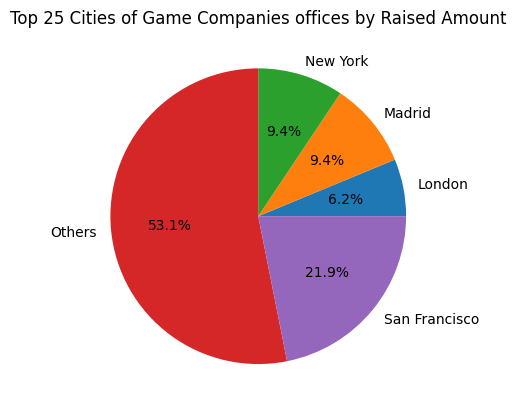

In [44]:
import matplotlib.pyplot as plt

# Group cities with count 1 as 'Others'
game_top_cities.loc[game_top_cities['count'] == 1, 'city'] = 'Others'

# Calculate the sum of counts for each city
city_counts = game_top_cities.groupby('city')['count'].sum()

# Create a pie plot
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%')

# Set the title
plt.title('Top 25 Cities of Game Companies offices by Raised Amount')

# Display the plot
plt.show()

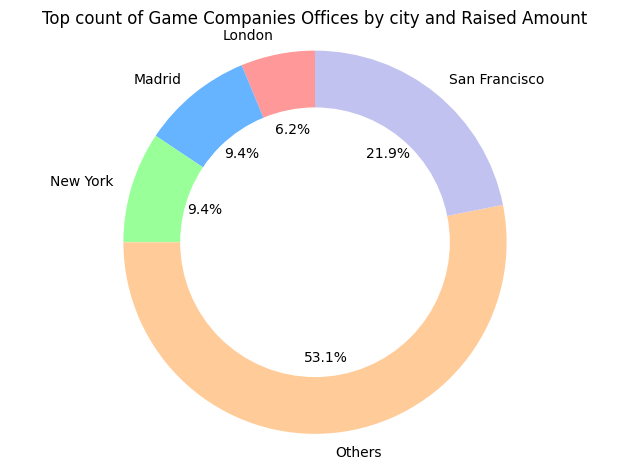

In [45]:
import matplotlib.pyplot as plt

# Group cities with count 1 as 'Others'
game_top_cities.loc[game_top_cities['count'] == 1, 'city'] = 'Others'

# Calculate the sum of counts for each city
city_counts = game_top_cities.groupby('city')['count'].sum()

# Define colors for the pie slices
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0f0', '#ffb3b3', '#ccff99', '#dab3ff']

# Create a pie plot
plt.pie(city_counts, labels=city_counts.index, autopct='%1.1f%%', colors=colors, startangle=90)

# Add a shadow to the pie plot
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='white'))

# Set the aspect ratio to be equal
plt.axis('equal')

# Set the title and adjust the layout
plt.title('Top count of Game Companies Offices by city and Raised Amount')
plt.tight_layout()

# Display and save the plot
plt.show()

In [46]:
#top_cities_design.to_csv("../dataframes/200M_game_cities_designers.csv", index=False)

df['longitude'] = ''

for index, row in df.iterrows():
    offices = row['offices']  
    for i in range(len(offices)):  
        x = offices[i].get('longitude', '')  
        df.at[index, 'longitude'] += (str(x) + ' ,')

df['latitude'] = ''

for index, row in df.iterrows():
    offices = row['offices']  
    for i in range(len(offices)):  
        x = offices[i].get('latitude', '')  
        df.at[index, 'latitude'] += (str(x) + ' ,')

In [47]:
c.find_one()

{'_id': ObjectId('52cdef7c4bab8bd675297d8a'),
 'name': 'Wetpaint',
 'permalink': 'abc2',
 'crunchbase_url': 'http://www.crunchbase.com/company/wetpaint',
 'homepage_url': 'http://wetpaint-inc.com',
 'blog_url': 'http://digitalquarters.net/',
 'blog_feed_url': 'http://digitalquarters.net/feed/',
 'twitter_username': 'BachelrWetpaint',
 'category_code': 'web',
 'number_of_employees': 47,
 'founded_year': 2005,
 'founded_month': 10,
 'founded_day': 17,
 'deadpooled_year': 1,
 'tag_list': 'wiki, seattle, elowitz, media-industry, media-platform, social-distribution-system',
 'alias_list': '',
 'email_address': 'info@wetpaint.com',
 'phone_number': '206.859.6300',
 'description': 'Technology Platform Company',
 'created_at': datetime.datetime(2007, 5, 25, 6, 51, 27),
 'updated_at': 'Sun Dec 08 07:15:44 UTC 2013',
 'overview': '<p>Wetpaint is a technology platform company that uses its proprietary state-of-the-art technology and expertise in social media to build and monetize audiences for di

In [48]:
condition={"total_money_raised":  {"$regex": "M$"}}
condition1={"total_money_raised":  {"$regex": "[MB]$"}}
condition2={"tag_list": {"$regex": "design"}}
condition3={"category_code": "design"}
condition4={"offices.city": "New York"}
condition5={"offices.city": "London"}
condition6={"offices.city": "San Francisco"}

query = {"$and": [{"$or": [condition, condition1]}, {"$or": [condition4,condition5,condition6]}, {"$or": [condition2, condition3]}]}
projection={"name":1, "_id":0, "total_money_raised":1, 
            "tag_list":1, "description":1, "offices":1, "category_code":1 }

design_gaming_money =list(c.find(query, projection))

In [49]:
df3=pd.DataFrame(design_gaming_money)
df3

,name,category_code,tag_list,description,total_money_raised,offices
0,Digg,news,"community, social, news, bookmark, digg, techn...",user driven social content website,$45M,"[{'description': None, 'address1': '135 Missis..."
1,Wix,web,"website, widget, design, flash, internet",Drag-and-Drop Web Publishing Platform,$58.5M,"[{'description': '', 'address1': '', 'address2..."
2,Gilt Groupe,fashion,"clothing, fashion, designer, apparel, luxury, ...",Designer Sample Sales Online,$236M,"[{'description': 'New York Office', 'address1'..."
3,99designs,design,"graphic-design, crowdsourcing, online-marketpl...",Online graphic design marketplace,$35M,"[{'description': 'United States (HQ)', 'addres..."
4,Minted,ecommerce,"crowd-sourcing, design, art, stationery, ecomm...",marketplace for design and art,$52.7M,"[{'description': '', 'address1': '747 Front St..."
5,Squarespace,web,"software, web-design, website-creation-platfor...",Fully-hosted website creator,$38.5M,"[{'description': 'Squarespace', 'address1': '4..."
6,Banyan Branch,news,"social-media, consulting, twitter, facebook, m...",Social media marketing agency,$1.7M,"[{'description': 'Seattle office', 'address1':..."
7,Netbiscuits,mobile,"mobile-web, cloud-platform, adaptive-web-techn...",Mobile Web Development Platform,$27M,"[{'description': 'Headquarters', 'address1': '..."
8,Moonfruit,design,,,$2.25M,"[{'description': 'UK Office', 'address1': '', ..."


In [50]:
df3['offices'][1]

[{'description': '',
  'address1': '',
  'address2': '',
  'zip_code': '',
  'city': 'Tel Aviv',
  'state_code': None,
  'country_code': 'ISR',
  'latitude': None,
  'longitude': None},
 {'description': '',
  'address1': '',
  'address2': '',
  'zip_code': '94105',
  'city': 'San Francisco',
  'state_code': 'CA',
  'country_code': 'USA',
  'latitude': None,
  'longitude': None}]

In [51]:
# Define the desired cities
desired_cities = ["New York", "London", "San Francisco"]

# Apply the filter on the "offices" column
df3['offices'] = df3['offices'].apply(lambda x: [office for office in x if any(city in office.get('city', '') for city in desired_cities)])


In [52]:
df3['offices'].values

array([list([{'description': None, 'address1': '135 Mississippi St', 'address2': '', 'zip_code': '94107', 'city': 'San Francisco', 'state_code': 'CA', 'country_code': 'USA', 'latitude': 37.764726, 'longitude': -122.394523}]),
       list([{'description': '', 'address1': '', 'address2': '', 'zip_code': '94105', 'city': 'San Francisco', 'state_code': 'CA', 'country_code': 'USA', 'latitude': None, 'longitude': None}]),
       list([{'description': 'New York Office', 'address1': '2 Park Ave Fl 4', 'address2': '', 'zip_code': '10016-5602', 'city': 'New York', 'state_code': 'NY', 'country_code': 'USA', 'latitude': 40.74727, 'longitude': -73.9800645}]),
       list([{'description': 'United States (HQ)', 'address1': '447 Battery St.', 'address2': '3rd Floor', 'zip_code': '94111', 'city': 'San Francisco', 'state_code': 'CA', 'country_code': 'USA', 'latitude': 37.7955307, 'longitude': -122.4005983}]),
       list([{'description': '', 'address1': '747 Front Street', 'address2': '2nd Floor', 'zip_

In [53]:
import pandas as pd

# Supongamos que tienes un DataFrame llamado df con una columna llamada "offices" que contiene una lista de diccionarios en cada celda.

# Crear una lista para almacenar las filas adicionales
new_rows = []

# Recorrer el DataFrame
for index, row in df3.iterrows():
    offices = row['offices']
    if len(offices) > 1:
        # Si la lista tiene más de un diccionario, crear una nueva fila por cada diccionario
        for office in offices:
            new_row = row.copy()
            new_row['offices'] = [office]
            new_rows.append(new_row)
    else:
        # Si la lista tiene solo un diccionario, mantener la fila original
        new_rows.append(row)

# Crear un nuevo DataFrame con las filas adicionales
df3= pd.DataFrame(new_rows)
df3.reset_index(drop=True, inplace=True)

In [54]:
df3

,name,category_code,tag_list,description,total_money_raised,offices
0,Digg,news,"community, social, news, bookmark, digg, techn...",user driven social content website,$45M,"[{'description': None, 'address1': '135 Missis..."
1,Wix,web,"website, widget, design, flash, internet",Drag-and-Drop Web Publishing Platform,$58.5M,"[{'description': '', 'address1': '', 'address2..."
2,Gilt Groupe,fashion,"clothing, fashion, designer, apparel, luxury, ...",Designer Sample Sales Online,$236M,"[{'description': 'New York Office', 'address1'..."
3,99designs,design,"graphic-design, crowdsourcing, online-marketpl...",Online graphic design marketplace,$35M,"[{'description': 'United States (HQ)', 'addres..."
4,Minted,ecommerce,"crowd-sourcing, design, art, stationery, ecomm...",marketplace for design and art,$52.7M,"[{'description': '', 'address1': '747 Front St..."
5,Squarespace,web,"software, web-design, website-creation-platfor...",Fully-hosted website creator,$38.5M,"[{'description': 'Squarespace', 'address1': '4..."
6,Banyan Branch,news,"social-media, consulting, twitter, facebook, m...",Social media marketing agency,$1.7M,"[{'description': 'New York office', 'address1'..."
7,Netbiscuits,mobile,"mobile-web, cloud-platform, adaptive-web-techn...",Mobile Web Development Platform,$27M,"[{'description': 'Netbiscuits UK', 'address1':..."
8,Netbiscuits,mobile,"mobile-web, cloud-platform, adaptive-web-techn...",Mobile Web Development Platform,$27M,"[{'description': 'New York Office', 'address1'..."
9,Netbiscuits,mobile,"mobile-web, cloud-platform, adaptive-web-techn...",Mobile Web Development Platform,$27M,"[{'description': 'San Francisco', 'address1': ..."


In [55]:
df3['longitude'] = ''

for index, row in df3.iterrows(): 
    offices = row['offices']
    for i in range(len(offices)):
        x = offices[i].get('longitude', '')
        df3.at[index, 'longitude'] += str(x)

In [56]:
df3['latitude'] = ''

for index, row in df3.iterrows(): 
    offices = row['offices']
    for i in range(len(offices)):
        x = offices[i].get('latitude', '')
        df3.at[index, 'latitude'] += str(x)

In [57]:
df3['city'] = ''

for index, row in df3.iterrows(): 
    offices = row['offices']
    for i in range(len(offices)):
        x = offices[i].get('city', '')
        df3.at[index, 'city'] += x

In [58]:
df3['address1'] = ''

for index, row in df3.iterrows(): 
    offices = row['offices']
    for i in range(len(offices)):
        x = offices[i].get('address1', '')
        df3.at[index, 'address1'] += x

In [59]:
df3['address2'] = ''

for index, row in df3.iterrows(): 
    offices = row['offices']
    for i in range(len(offices)):
        x = offices[i].get('address2', '')
        df3.at[index, 'address2'] += x

In [60]:
df3['state_code'] = ''

for index, row in df3.iterrows(): 
    offices = row['offices']
    for i in range(len(offices)):
        x = offices[i].get('state_code', '')
        df3.at[index, 'state_code'] += str(x)

In [61]:
df3['country_code'] = ''

for index, row in df3.iterrows(): 
    offices = row['offices']
    for i in range(len(offices)):
        x = offices[i].get('country_code', '')
        df3.at[index, 'country_code'] += x

In [62]:
df3['description2'] = ''

for index, row in df3.iterrows(): 
    offices = row['offices']
    for i in range(len(offices)):
        x = offices[i].get('description', '')
        df3.at[index, 'description2'] += str(x)

In [63]:
df3 = df3.drop("offices", axis=1)

In [64]:
df3

,name,category_code,tag_list,description,total_money_raised,longitude,latitude,city,address1,address2,state_code,country_code,description2
0,Digg,news,"community, social, news, bookmark, digg, techn...",user driven social content website,$45M,-122.394523,37.764726,San Francisco,135 Mississippi St,,CA,USA,None
1,Wix,web,"website, widget, design, flash, internet",Drag-and-Drop Web Publishing Platform,$58.5M,None,None,San Francisco,,,CA,USA,
2,Gilt Groupe,fashion,"clothing, fashion, designer, apparel, luxury, ...",Designer Sample Sales Online,$236M,-73.9800645,40.74727,New York,2 Park Ave Fl 4,,NY,USA,New York Office
3,99designs,design,"graphic-design, crowdsourcing, online-marketpl...",Online graphic design marketplace,$35M,-122.4005983,37.7955307,San Francisco,447 Battery St.,3rd Floor,CA,USA,United States (HQ)
4,Minted,ecommerce,"crowd-sourcing, design, art, stationery, ecomm...",marketplace for design and art,$52.7M,-122.403175,37.797435,San Francisco,747 Front Street,2nd Floor,CA,USA,
5,Squarespace,web,"software, web-design, website-creation-platfor...",Fully-hosted website creator,$38.5M,None,None,New York,459 Broadway,5th Floor,NY,USA,Squarespace
6,Banyan Branch,news,"social-media, consulting, twitter, facebook, m...",Social media marketing agency,$1.7M,None,None,New York,"455 Broadway, 3rd Floor",,NY,USA,New York office
7,Netbiscuits,mobile,"mobile-web, cloud-platform, adaptive-web-techn...",Mobile Web Development Platform,$27M,-0.1547377,51.513248,London,25 North Row,,None,GBR,Netbiscuits UK
8,Netbiscuits,mobile,"mobile-web, cloud-platform, adaptive-web-techn...",Mobile Web Development Platform,$27M,None,None,New York,7th Floor,275 Seventh Ave,NY,USA,New York Office
9,Netbiscuits,mobile,"mobile-web, cloud-platform, adaptive-web-techn...",Mobile Web Development Platform,$27M,-122.4264417,37.7550372,San Francisco,Suite 2200,425 Market Street,CA,USA,San Francisco


In [65]:
import requests
import json
import pandas as pd
from getpass import getpass
import time
from dotenv import load_dotenv


In [66]:
def get_coordinates (where):

    url_geocode = f"https://geocode.xyz/{where}?json=1"
    
    try:
        res = requests.get(url_geocode).json()
        return res["longt"], res["latt"]
    
    except:
        print(f"Sorry, no matches for {where}")
        time.sleep(3)
        get_coordinates(where)

In [67]:
#netbiscuits_NY=get_coordinates ("275 Seventh Ave, New York")
#netbiscuits_NY

In [68]:
netbiscuits_lon= '-73.93230'
netbiscuits_lat= '40.69517'

In [69]:
# Update the value of the "longitude" column
df3.loc[(df3['name'] == 'Netbiscuits') & (df3['state_code'] == 'NY'), 'longitude'] = netbiscuits_lon
df3.loc[(df3['name'] == 'Netbiscuits') & (df3['state_code'] == 'NY'), 'latitude'] = netbiscuits_lat

In [70]:
#wix_CA=get_coordinates ("Wix, San Francisco")
#wix_CA

In [71]:
wix_lon= '-122.40507'
wix_lat= '37.75672'

In [72]:
df3.loc[df3['name'] == 'Wix', 'longitude'] = wix_lon
df3.loc[df3['name'] == 'Wix', 'latitude'] = wix_lat

In [73]:
#squarespace_NY=get_coordinates ("459 Broadway, New York")
#squarespace_NY

In [74]:
squarespace_lon='-74.00087'
squarespace_lat='40.72081'

In [75]:
df3.loc[df3['name'] == 'Squarespace', 'longitude'] = squarespace_lon
df3.loc[df3['name'] == 'Squarespace', 'latitude'] = squarespace_lat

In [76]:
#banyan_NY=get_coordinates ("455 Broadway, New York")
#banyan_NY

In [77]:
banyan_lon='-73.93230'
banyan_lat='40.69517'

In [78]:
df3.loc[df3['name'] == 'Banyan Branch', 'longitude'] = banyan_lon
df3.loc[df3['name'] == 'Banyan Branch', 'latitude'] = banyan_lat

In [79]:
#moonfruit_NY=get_coordinates (" 138 Holborn, London EC1N 2SW, United Kingdom")
#moonfruit_NY

In [80]:
moonfruit_lon='-0.11016'
moonfruit_lat='51.51913'

In [81]:
df3.loc[df3['name'] == 'Moonfruit', 'longitude'] = moonfruit_lon
df3.loc[df3['name'] == 'Moonfruit','latitude'] = moonfruit_lat


In [82]:
df3['name'].values

array(['Digg', 'Wix', 'Gilt Groupe', '99designs', 'Minted', 'Squarespace',
       'Banyan Branch', 'Netbiscuits', 'Netbiscuits', 'Netbiscuits',
       'Moonfruit'], dtype=object)

In [83]:
df3

,name,category_code,tag_list,description,total_money_raised,longitude,latitude,city,address1,address2,state_code,country_code,description2
0,Digg,news,"community, social, news, bookmark, digg, techn...",user driven social content website,$45M,-122.394523,37.764726,San Francisco,135 Mississippi St,,CA,USA,None
1,Wix,web,"website, widget, design, flash, internet",Drag-and-Drop Web Publishing Platform,$58.5M,-122.40507,37.75672,San Francisco,,,CA,USA,
2,Gilt Groupe,fashion,"clothing, fashion, designer, apparel, luxury, ...",Designer Sample Sales Online,$236M,-73.9800645,40.74727,New York,2 Park Ave Fl 4,,NY,USA,New York Office
3,99designs,design,"graphic-design, crowdsourcing, online-marketpl...",Online graphic design marketplace,$35M,-122.4005983,37.7955307,San Francisco,447 Battery St.,3rd Floor,CA,USA,United States (HQ)
4,Minted,ecommerce,"crowd-sourcing, design, art, stationery, ecomm...",marketplace for design and art,$52.7M,-122.403175,37.797435,San Francisco,747 Front Street,2nd Floor,CA,USA,
5,Squarespace,web,"software, web-design, website-creation-platfor...",Fully-hosted website creator,$38.5M,-74.00087,40.72081,New York,459 Broadway,5th Floor,NY,USA,Squarespace
6,Banyan Branch,news,"social-media, consulting, twitter, facebook, m...",Social media marketing agency,$1.7M,-73.93230,40.69517,New York,"455 Broadway, 3rd Floor",,NY,USA,New York office
7,Netbiscuits,mobile,"mobile-web, cloud-platform, adaptive-web-techn...",Mobile Web Development Platform,$27M,-0.1547377,51.513248,London,25 North Row,,None,GBR,Netbiscuits UK
8,Netbiscuits,mobile,"mobile-web, cloud-platform, adaptive-web-techn...",Mobile Web Development Platform,$27M,-73.93230,40.69517,New York,7th Floor,275 Seventh Ave,NY,USA,New York Office
9,Netbiscuits,mobile,"mobile-web, cloud-platform, adaptive-web-techn...",Mobile Web Development Platform,$27M,-122.4264417,37.7550372,San Francisco,Suite 2200,425 Market Street,CA,USA,San Francisco


In [84]:
df3.to_csv("../dataframes/design_coordinates.csv", index=False)

In [85]:
df_sanfrancisco= df3[df3['city'] == 'San Francisco'][['name', 'latitude', 'longitude']].copy()
df_sanfrancisco.to_csv("../dataframes/df_sanfrancisco.csv", index=False)

with open("data/coffe_shops.json", "w") as f:
    json.dump(new_list, f)

In [86]:
df_newyork= df3[df3['city'] == 'New York'][['name', 'latitude', 'longitude']].copy()
df_newyork.to_csv("../dataframes/df_newyork.csv", index=False)

In [87]:
df_london= df3[df3['city'] == 'London'][['name', 'latitude', 'longitude']].copy()
df_london.to_csv("../dataframes/df_london.csv", index=False)

In [88]:
#df3.to_csv("../dataframes/design_coordinates.csv", index=False)